# python versus R
## simple data analysis, wrangling, and plotting
Below is R summary 
More details may be found at ... 
python equivalent in data-science_R_summary notebook in same folder

In [38]:
gapminder_data <- read.csv("https://raw.githubusercontent.com/berndtlindner/R_and_python/master/data/gapminder_lifeExp_gdp.csv")
head(gapminder_data)

X,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1952,28.801,8425333,779.4453
2,Afghanistan,Asia,1957,30.332,9240934,820.8530
3,Afghanistan,Asia,1962,31.997,10267083,853.1007
4,Afghanistan,Asia,1967,34.020,11537966,836.1971
5,Afghanistan,Asia,1972,36.088,13079460,739.9811
6,Afghanistan,Asia,1977,38.438,14880372,786.1134


In [39]:
continent_color <- data.frame(continent=c("Asia", "Europe","Africa", "Americas", "Oceania"),
                               color=c("red", "blue", "green", "purple", "pink"))

In [40]:
library(dplyr)
data <-  gapminder_data  %>% 
group_by(continent, year)  %>%  
summarise(lifeExp_mean = mean(lifeExp))  %>% 
left_join(continent_color, by = "continent")    #left_join on colors for the continents
data  %>% head()

continent,year,lifeExp_mean,color
Africa,1952,39.13550,green
Africa,1957,41.26635,green
Africa,1962,43.31944,green
Africa,1967,45.33454,green
Africa,1972,47.45094,green
Africa,1977,49.58042,green


In [41]:
lm(data$year ~ data$lifeExp_mean) #Fitting Linear Models [lm(y ~ x1+x2+....)]


Call:
lm(formula = data$year ~ data$lifeExp_mean)

Coefficients:
      (Intercept)  data$lifeExp_mean  
        1928.1693             0.8025  


Let's fit a linear model to expected life expectency (also let's exclude "Oceania") We use the broom package, which converts statistical analysis objects (for example the lm function or any user defined function) in R into tidy format

In [42]:
library(broom)
data %>% 
filter(continent!="Oceania")  %>%  #not interested in Oceania
do(tidy(lm(lifeExp_mean ~ year, .)))

continent,term,estimate,std.error,statistic,p.value
Africa,(Intercept),-524.2578461,53.64492850,-9.772738,1.961582e-06
Africa,year,0.2895293,0.02709921,10.684047,8.639697e-07
Americas,(Intercept),-663.1062932,23.87082826,-27.778939,8.478378e-11
Americas,year,0.3676509,0.01205856,30.488791,3.375967e-11
Asia,(Intercept),-836.8908953,36.46443200,-22.950883,5.567594e-10
Asia,year,0.4531224,0.01842033,24.599037,2.813781e-10
Europe,(Intercept),-367.4109940,20.09478025,-18.283902,5.149107e-09
Europe,year,0.2219321,0.01015106,21.862960,8.969989e-10


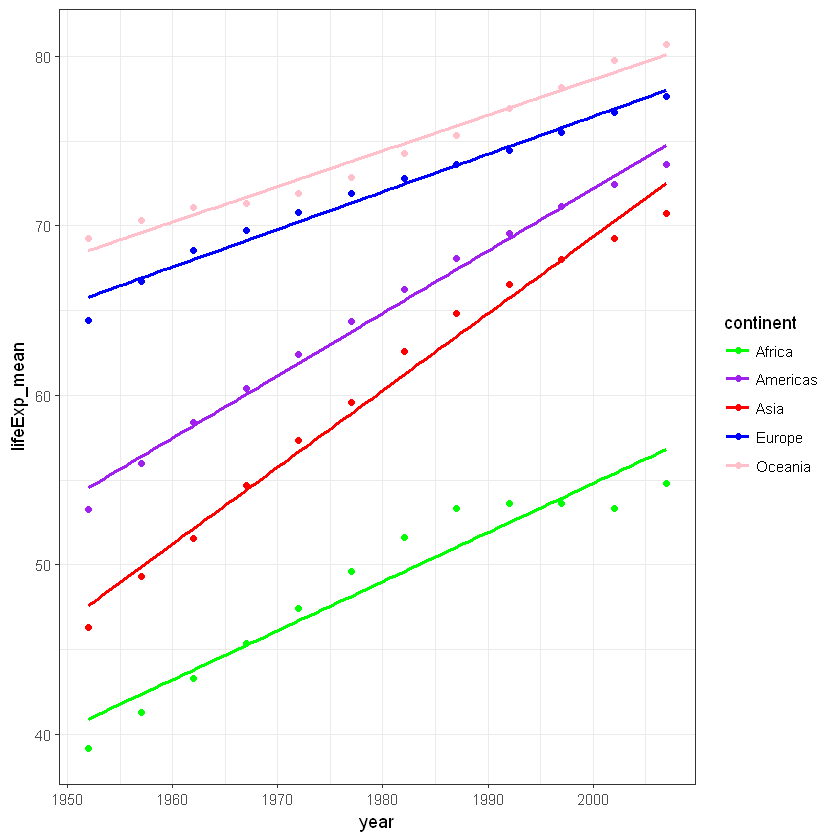

In [43]:
library(ggplot2)
ggplot(data, aes(x = year, y = lifeExp_mean, col=continent)) +
geom_point()  +
scale_colour_manual(values=setNames(as.character(continent_color$color),as.character(continent_color$continent))) + #change c
geom_smooth(method=lm, se=FALSE, fullrange=TRUE) + #se
theme_bw()
